# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count# remove the cities name
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    #sleep to protect API key of too many calls at the same time    
    count = 5
    while count < 5:
        time.sleep(2)
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}APPID={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pavlovka
Processing Record 2 of Set 1 | kharod
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | kaitangata
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | high level
Processing Record 9 of Set 1 | shitkino
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | tofield
Processing Record 16 of Set 1 | kaeo
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | san rafael del sur
Processing Record 23 of Set 1 | bluff
Proce

Processing Record 33 of Set 4 | marshall
Processing Record 34 of Set 4 | general roca
Processing Record 35 of Set 4 | poum
Processing Record 36 of Set 4 | ishigaki
Processing Record 37 of Set 4 | alofi
Processing Record 38 of Set 4 | palana
Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | cumaribo
City not found. Skipping...
Processing Record 41 of Set 4 | college
Processing Record 42 of Set 4 | burnie
Processing Record 43 of Set 4 | pevek
Processing Record 44 of Set 4 | san carlos de bariloche
Processing Record 45 of Set 4 | fairbanks
Processing Record 46 of Set 4 | ovsyanka
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | cookeville
Processing Record 49 of Set 4 | neuquen
Processing Record 0 of Set 5 | tuensang
Processing Record 1 of Set 5 | torbay
Processing Record 2 of Set 5 | worland
Processing Record 3 of Set 5 | tecolutla
Processing Record 4 of Set 5 | outjo
Processing Record 5 of Set 5 | powassan
Processing Record 6 of Set 5 | pav

Processing Record 25 of Set 8 | terrace bay
Processing Record 26 of Set 8 | cochrane
Processing Record 27 of Set 8 | miles city
Processing Record 28 of Set 8 | touros
Processing Record 29 of Set 8 | sur
Processing Record 30 of Set 8 | nelson bay
Processing Record 31 of Set 8 | beausoleil
Processing Record 32 of Set 8 | dodge city
Processing Record 33 of Set 8 | syasstroy
Processing Record 34 of Set 8 | saint-joseph
Processing Record 35 of Set 8 | nara
Processing Record 36 of Set 8 | luena
Processing Record 37 of Set 8 | nantucket
Processing Record 38 of Set 8 | iaciara
Processing Record 39 of Set 8 | jacutinga
Processing Record 40 of Set 8 | muti
Processing Record 41 of Set 8 | jiddah
City not found. Skipping...
Processing Record 42 of Set 8 | la ronge
Processing Record 43 of Set 8 | libreville
Processing Record 44 of Set 8 | mnogovershinnyy
Processing Record 45 of Set 8 | sakaraha
Processing Record 46 of Set 8 | norsup
Processing Record 47 of Set 8 | novyy urengoy
Processing Record 48

Processing Record 13 of Set 12 | kahului
Processing Record 14 of Set 12 | karksi-nuia
Processing Record 15 of Set 12 | westport
Processing Record 16 of Set 12 | springbok
Processing Record 17 of Set 12 | puerto penasco
Processing Record 18 of Set 12 | jinchang
Processing Record 19 of Set 12 | prata
Processing Record 20 of Set 12 | okmulgee
Processing Record 21 of Set 12 | parlakimidi
Processing Record 22 of Set 12 | bargal
City not found. Skipping...
Processing Record 23 of Set 12 | villa de reyes
Processing Record 24 of Set 12 | salisbury
Processing Record 25 of Set 12 | omboue
Processing Record 26 of Set 12 | burica
City not found. Skipping...
Processing Record 27 of Set 12 | fort nelson
Processing Record 28 of Set 12 | itoman
Processing Record 29 of Set 12 | warqla
City not found. Skipping...
Processing Record 30 of Set 12 | sesheke
Processing Record 31 of Set 12 | ust-bolsheretsk
City not found. Skipping...
Processing Record 32 of Set 12 | ozgon
City not found. Skipping...
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pavlovka,52.6897,47.1405,-5.38,90,99,3.38,RU,1678122152
1,kharod,21.7500,82.5667,25.62,24,7,1.06,IN,1678122152
2,hobart,-42.8794,147.3294,15.14,67,100,7.72,AU,1678122011
3,kaitangata,-46.2817,169.8464,7.54,95,39,2.03,NZ,1678122152
4,kodiak,57.7900,-152.4072,-1.75,74,82,1.44,US,1678122153


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pavlovka,52.6897,47.1405,-5.38,90,99,3.38,RU,1678122152
1,kharod,21.7500,82.5667,25.62,24,7,1.06,IN,1678122152
2,hobart,-42.8794,147.3294,15.14,67,100,7.72,AU,1678122011
3,kaitangata,-46.2817,169.8464,7.54,95,39,2.03,NZ,1678122152
4,kodiak,57.7900,-152.4072,-1.75,74,82,1.44,US,1678122153


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

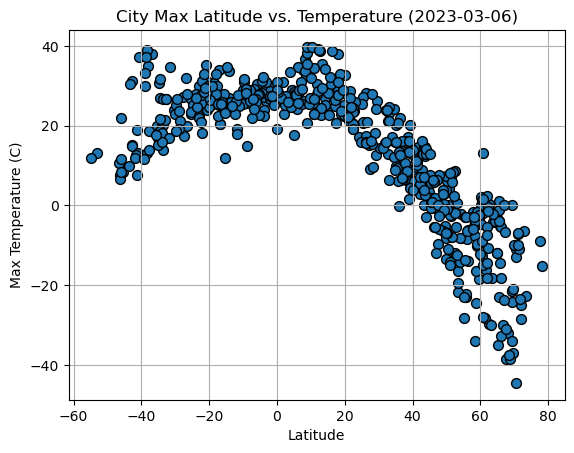

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat","Max Temp", s= 50, edgecolors= "black")

#convert Unix Epoch to Datetime
date = city_data_df.iloc[1,8]
convertingDate = datetime.fromtimestamp(date)
convertingDateToStr = convertingDate.strftime("%Y-%m-%d") 

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({convertingDateToStr})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

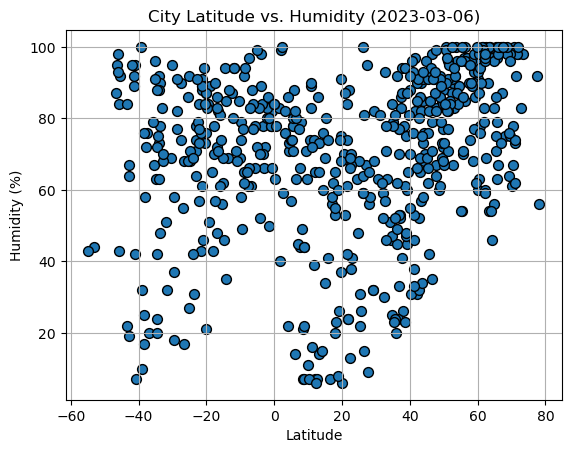

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat","Humidity", s= 50, edgecolors= "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({convertingDateToStr})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

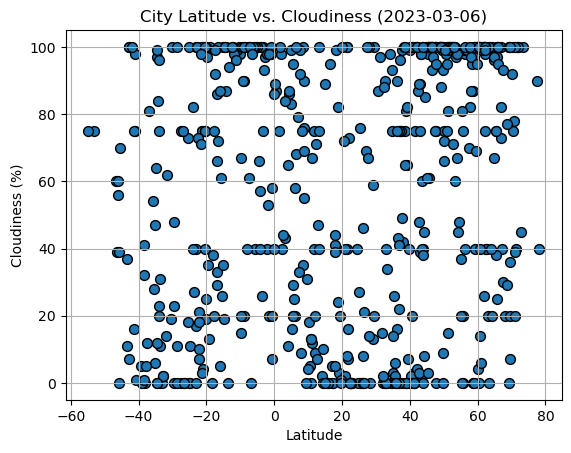

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat","Cloudiness", s= 50, edgecolors= "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({convertingDateToStr})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

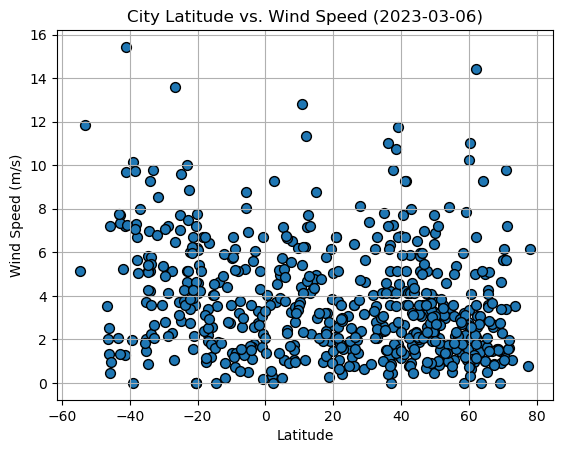

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat","Wind Speed", s= 50, edgecolors= "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({convertingDateToStr})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def reg(x,y,ylabel,title,location): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,location,fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.iloc[:,1] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pavlovka,52.6897,47.1405,-5.38,90,99,3.38,RU,1678122152
1,kharod,21.7500,82.5667,25.62,24,7,1.06,IN,1678122152
4,kodiak,57.7900,-152.4072,-1.75,74,82,1.44,US,1678122153
5,hilo,19.7297,-155.0900,22.38,91,2,2.68,US,1678122153
6,albany,42.6001,-73.9662,6.87,52,48,5.86,US,1678122114


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.iloc[:,1] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hobart,-42.8794,147.3294,15.14,67,100,7.72,AU,1678122011
3,kaitangata,-46.2817,169.8464,7.54,95,39,2.03,NZ,1678122152
10,avarua,-21.2078,-159.7750,28.03,89,75,6.69,CK,1678122154
11,rikitea,-23.1203,-134.9692,26.92,78,100,9.99,PF,1678122155
12,port lincoln,-34.7333,135.8667,16.43,63,64,5.84,AU,1678122155


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7900364168938699


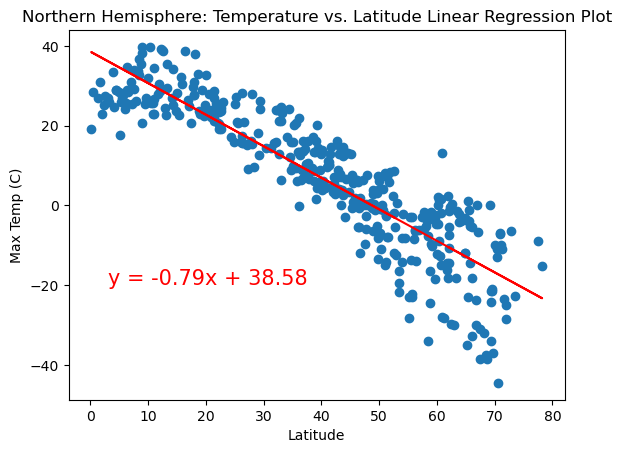

In [15]:
# Linear regression on Northern Hemisphere
reg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Max Temp (C)","Northern Hemisphere: Temperature vs. Latitude Linear Regression Plot",(3,-20))    

The r-squared is: 0.22561250318125084


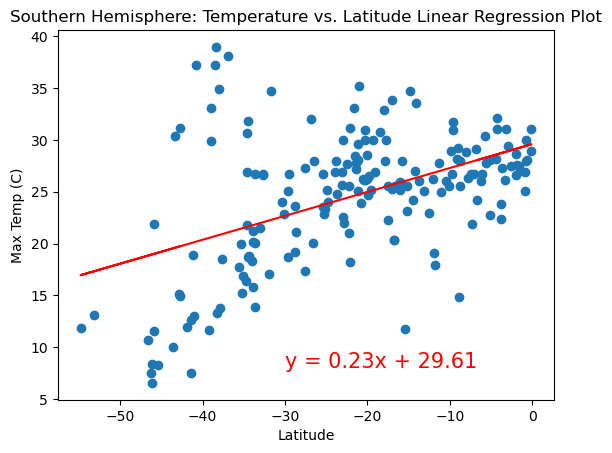

In [23]:
# Linear regression on Southern Hemisphere
reg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Max Temp (C)","Southern Hemisphere: Temperature vs. Latitude Linear Regression Plot",(-30,8)) 

**Discussion about the linear relationship:**  The linear regression is used here to try to predict the value of the Max Temperatures (C) variable based on the value of the Latitudes variable in the Northern and Southern Hemispheres. The R-Squared for the Northern Hemisphere is 0.79, what is considered a strong strength of the regression model. That means that the variability observed is well explained by the regression model. However, the R-Squared for the Southern Hemisphere is only 0.22, what is considered a very weak strength of the regression model. 
More statistical data is needed in order to draw a definitive conclusion.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.2351474601696126


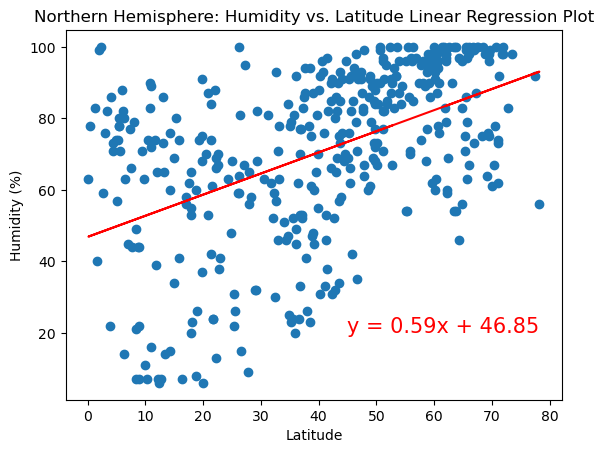

In [17]:
# Northern Hemisphere
reg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Humidity (%)","Northern Hemisphere: Humidity vs. Latitude Linear Regression Plot",(45,20))    

The r-squared is: 0.05089017229026515


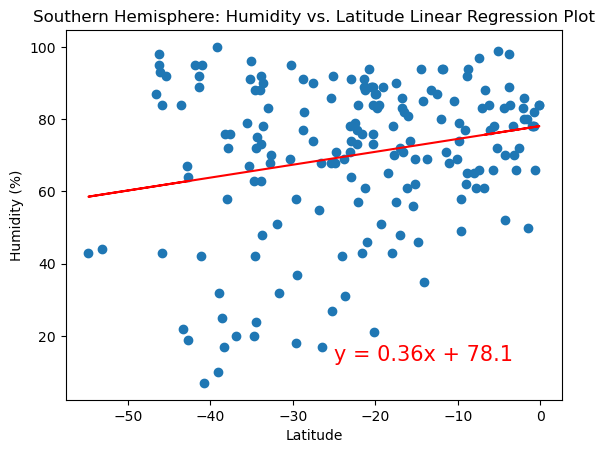

In [25]:
# Southern Hemisphere
reg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Humidity (%)","Southern Hemisphere: Humidity vs. Latitude Linear Regression Plot",(-25,13)) 

**Discussion about the linear relationship:** The linear regression is used here to try to predict the value of the Humidity(%) variable based on the value of the Latitudes variable in the Northern and Southern Hemispheres. The R-Squared for the Northern Hemisphere is only 0.23, what is considered a very weak strength of the regression model. Moreover, the R-Squared for the Southern Hemisphere is only 0.05, also a very weak strength. That means that the variability observed is not well explained by the regression model. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.09747390879497139


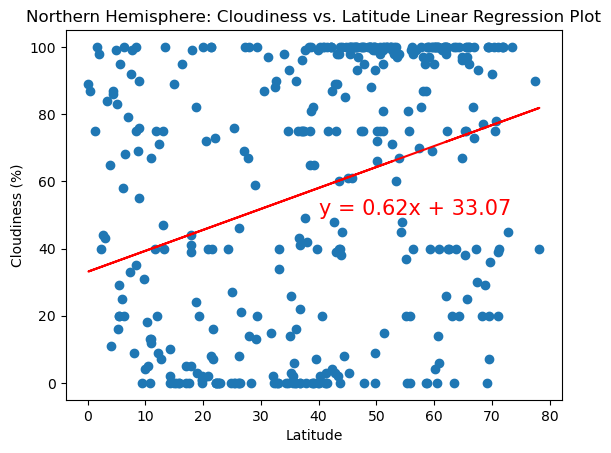

In [29]:
# Northern Hemisphere
reg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Cloudiness (%)","Northern Hemisphere: Cloudiness vs. Latitude Linear Regression Plot",(40,50))    

The r-squared is: 0.10190925003007927


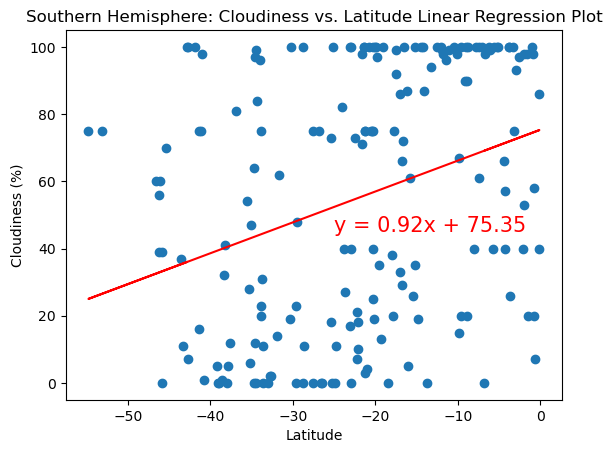

In [32]:
# Southern Hemisphere
reg(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Cloudiness (%)","Southern Hemisphere: Cloudiness vs. Latitude Linear Regression Plot",(-25,45))

**Discussion about the linear relationship:** The linear regression is used here to try to predict the value of the Cloudiness (%) variable based on the value of the Latitudes variable in the Northern and Southern Hemispheres. The R-Squared for the Northern Hemisphere is only 0.09, what is considered a very weak strength of the regression model. Moreover, the R-Squared for the Southern Hemisphere is only 0.10, also a very weak strength. That means that the variability observed is not well explained by the regression model. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.01336638872058394


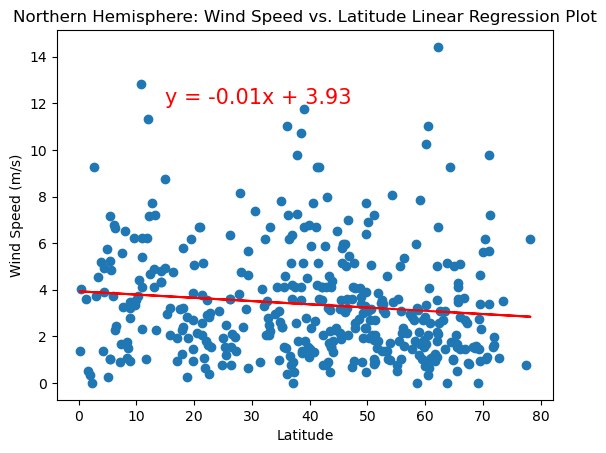

In [38]:
# Northern Hemisphere
reg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Wind Speed (m/s)","Northern Hemisphere: Wind Speed vs. Latitude Linear Regression Plot",(15,12))    

The r-squared is: 0.08373298222456708


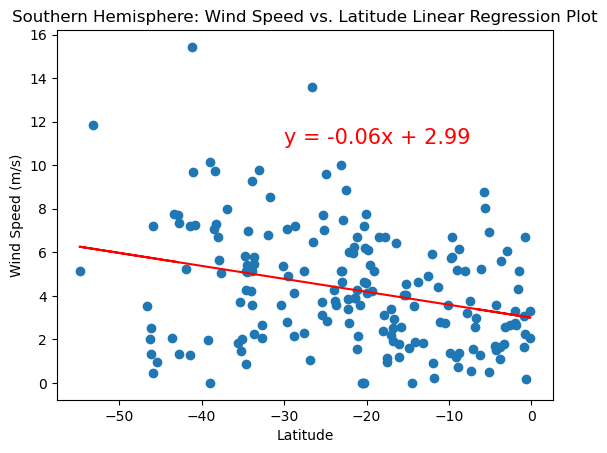

In [22]:
# Southern Hemisphere
reg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Wind Speed (m/s)","Southern Hemisphere: Wind Speed vs. Latitude Linear Regression Plot",(-30,11))

**Discussion about the linear relationship:** The linear regression is used here to try to predict the value of the Wind Speed (m/s) variable based on the value of the Latitudes variable in the Northern and Southern Hemispheres. The R-Squared for the Northern Hemisphere is only 0.01, what is considered a very weak strength of the regression model. Moreover, the R-Squared for the Southern Hemisphere is only 0.08, also a very weak strength. That means that the variability observed is not well explained by the regression model. 